# Generating the data cube


## What is a data cube?
A spectral line data cube is a type of astronomical data set that usual includes one spectral dimension and two spatial dimensions. The spectral dimension may represent the physical quantities of wavelength ($\lambda$), frequency ($\nu$), or velocity ($v$). Generally we call the images in the spectral dimension **channels**, which then have some width, $\Delta \lambda$ or $\Delta \nu$ or $\Delta v$. In the context of extragalactic astronomy, and usually *with respect to a particular spectral line*, these quantities are all connected by the definition of **redshift**, $z$:

$$ \frac{\Delta v}{c} = \frac{\Delta \lambda}{\lambda_{\rm obs}} = \frac{\Delta \nu}{\nu_{\rm obs}},$$

where $c$ is the speed of light, and for that spectral line, the observed wavelength is defined $\lambda_{\rm obs} = \lambda_{\rm rest} (1+z)$, and the observed frequency is defined $\nu_{\rm obs} = \nu_{\rm rest}/(1+z)$).

## What does a galaxy spectrum look like?
We often see a continuum component and spectral emission or absorption lines in a galaxy spectrum. This obviously will depend on the source gaalaxy, and at which wavelength/frequency/energy we're looking.

In our case, we will consider a power-law continuum of the form
$$ F_{\rm \nu}^{\rm (cont)} = F_{\nu, 0} \Big(\frac{\nu}{\nu_0}\Big)^{\alpha},$$
where $F_{\nu, 0}$ is the flux density at some point-of-reference frequency $\nu_0$. $\alpha$ is often called the **power-law slope** or **spectral index**, and this is because it is equal to the log-log slope of the flux density: $\alpha \equiv d \log F_\nu / d\log \nu$. $\nu_0$ is arbitrary since it covaries with $F_{\nu, 0}$, so we can just select a reference frequency.

A simple spectral line model is a Gaussian distribution:
$$ F_{\rm \nu}^{\rm (line)} = \frac{F^{\rm (line)}}{\sqrt{2 \pi \sigma^2}}\exp \Bigg [ \frac{\big(\nu - \nu_{\rm rest}/(1+z)\big)^2}{2\sigma^2}\Bigg ]. $$
Here $\sigma$ parameterizes the width of the line (usually a function of velocity dispersion), and $F^{\rm (line)}$ is the total integrated line flux. $\nu_{\rm rest}/(1+z)$ is the observed (redshifted) spectral line frequency.

In total, we have five degrees of freedom: $F_\nu^{\rm (cont)}$, $\alpha$, $F^{\rm (line)}$, $z$, and $\sigma$.

## An example below

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline 

# constants
CO_REST_FREQUENCY = 115.27    # CO (1-0) rotational transition in GHz

# parameters
flux_density_cont = 2.4
continuum_index = -0.8
line_flux = 0.03
z = 0.3
velocity_width = 250          # km/s

# convert velocity to frequency [GHz]
SPEED_OF_LIGHT = 3e5          # km/s
line_sigma = CO_REST_FREQUENCY * velocity_width / SPEED_OF_LIGHT

model_params = [flux_density_cont, continuum_index, line_flux, z, line_sigma]

# make an array of wavelengths near the redshifted CO line
N_k = 128                     # number of channels, note k -> spectral dimension
channel_width = 0.05          # [GHz]
frequencies = np.linspace(-N_k/2+1, N_k/2, N_k) * channel_width + CO_REST_FREQUENCY/(1+z)

def model_spectrum(frequencies, *parameters):
    """Generate a model spectrum using a simple five-parameter model.
    Two parameters determine the continuum flux density and three
    parameters determine the spectral line flux density.
    
    Note that the point-of-reference continuum frequency is the CO (1-0) 
    rest frequency.
    """
    flux_density_cont, continuum_index, line_flux, z, line_sigma = parameters
    
    return flux_density_cont * (frequencies/CO_REST_FREQUENCY)**continuum_index +\
            line_flux/(2*np.pi * line_sigma**2) * \
            np.exp(-(frequencies-CO_REST_FREQUENCY/(1+z))**2/(2*line_sigma**2))

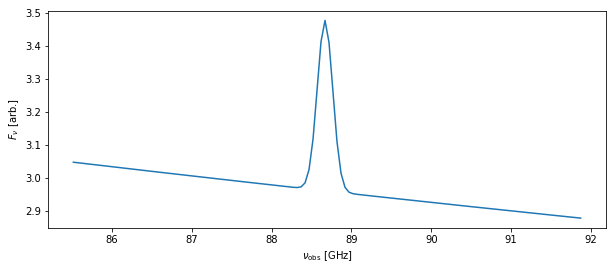

In [2]:
# generate spectrum and plot
spectrum = model_spectrum(frequencies, *model_params)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectrum)
plt.xlabel(r'$\nu_{\rm obs}$ [GHz]')
plt.ylabel(r'$F_\nu$ [arb.]')
plt.show();